# Deterministic SIR

In [1]:
import matplotlib.pyplot as plt

In [2]:
def det_sir(S0, I0, R0, beta, gamma, n_days):
    n_population = S0 + I0 + R0
    S = [S0] * n_days
    I = [I0] * n_days
    R = [R0] * n_days
    for i in range(n_days-1):
        S[i+1] = S[i] - beta * S[i] * I[i] / n_population
        I[i+1] = I[i] + beta * S[i] * I[i] / n_population - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]
    return S, I, R

S, I, R = det_sir(S0=999, I0=1, R0=0, beta=0.3, gamma=0.05, n_days=100)

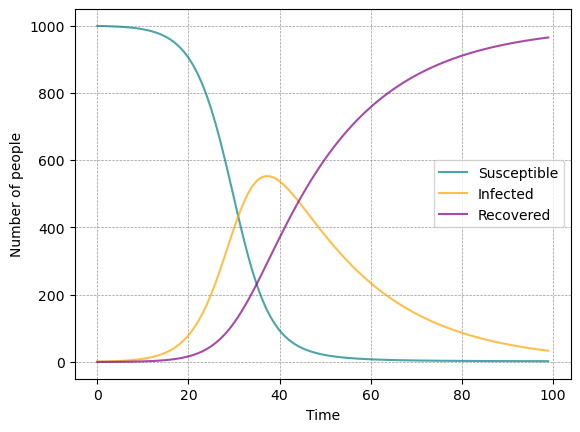

In [3]:
fig, ax = plt.subplots()
ax.plot(S, color='teal', alpha=0.7, label='Susceptible')
ax.plot(I, color='orange', alpha =0.7, label='Infected')
ax.plot(R, color='purple', alpha=0.7, label='Recovered')
ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

In [4]:
import numpy as np
betas = np.arange(0, 0.5, 0.005)
max_size_beta = []
for b in betas:
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=b, gamma=0.05, n_days=100)
    max_size_beta.append(max(I))

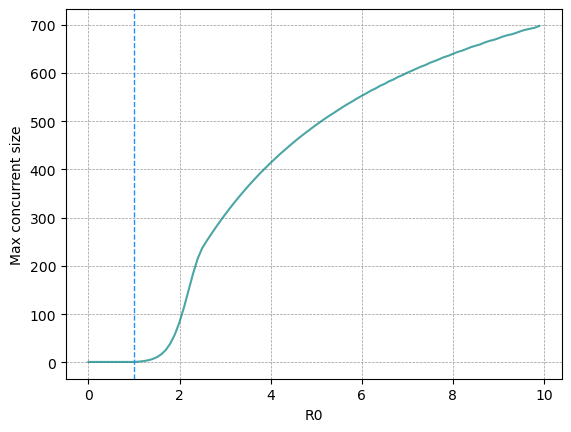

In [5]:
fig, ax = plt.subplots()
ax.plot([b/0.05 for b in betas], max_size_beta, color='teal', alpha=0.7)
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)


In [6]:
import random
random.uniform(0,1)

0.5411085850005367

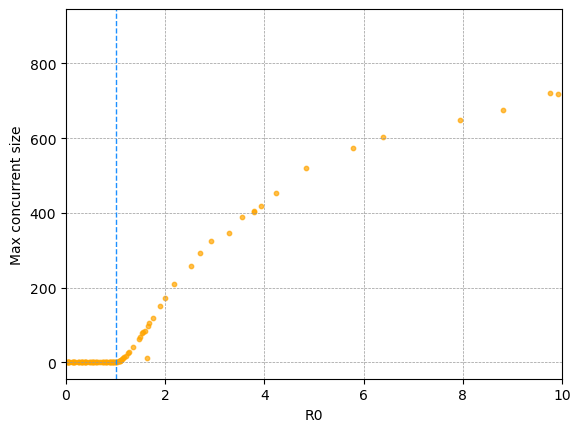

In [7]:
fig, ax = plt.subplots()
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 10)
for i in range(100):
    beta = random.uniform(0, 1)
    gamma = random.uniform(0, 1)
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=beta, gamma=gamma, n_days=100)
    max_size = max(I)
    R0 = beta / gamma
    ax.scatter(R0, max_size, color='orange', alpha=0.7, s=10)

# Stochastic SIR 

In [8]:
def stochastic_sir(S0, I0, R0, beta, gamma, n_days): 
    n_population = S0 + I0 + R0
    S = [S0] * n_days
    I = [I0] * n_days
    R = [R0] * n_days

    for i in range(n_days-1):
        Lambda = beta * I[i]/n_population
        
        S_out = np.random.binomial(S[i], Lambda)
        I_in = S_out
        I_out = np.random.binomial(I[i], gamma)
        R_in = I_out

        S[i+1] = S[i] - S_out
        I[i+1] = I[i] + I_in - I_out
        R[i+1] = R[i] + R_in
    return S, I, R


In [24]:
S, I, R = det_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)


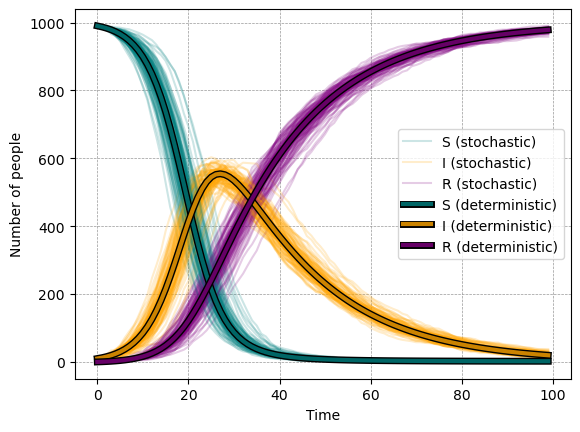

In [ ]:
fig, ax = plt.subplots()

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)
    if i ==0:
        ax.plot(S_sto, color='teal', alpha=0.2, label='S (stochastic)')
        ax.plot(I_sto, color='orange', alpha =0.2, label='I (stochastic)')
        ax.plot(R_sto, color='purple', alpha=0.2, label='R (stochastic)')
    else:
        ax.plot(S_sto, color='teal', alpha=0.2)
        ax.plot(I_sto, color='orange', alpha =0.2)
        ax.plot(R_sto, color='purple', alpha=0.2)
    
import matplotlib.patheffects as pe
ax.plot(S, color='teal', alpha=0.8, label='S (deterministic)', linewidth=3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.plot(I, color='orange', alpha =0.8, label='I (deterministic)', linewidth =3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.plot(R, color='purple', alpha=0.8, label='R (deterministic)', linewidth =3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

In [52]:
import pandas as pd
sir_sto = pd.DataFrame(columns=['t', 'S', 'I', 'R'])

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)
    df = pd.DataFrame({'t': range(0,100),
                       'S': S_sto, 
                       'I': I_sto, 
                       'R': R_sto})
    sir_sto = pd.concat([sir_sto, df], ignore_index=True)
     

In [80]:
sir_sto[['S', 'I', 'R']] = sir_sto[['S', 'I', 'R']].apply(pd.to_numeric)
quantiles = sir_sto.groupby('t').describe(percentiles=[.05, .5, .95])
# quantiles

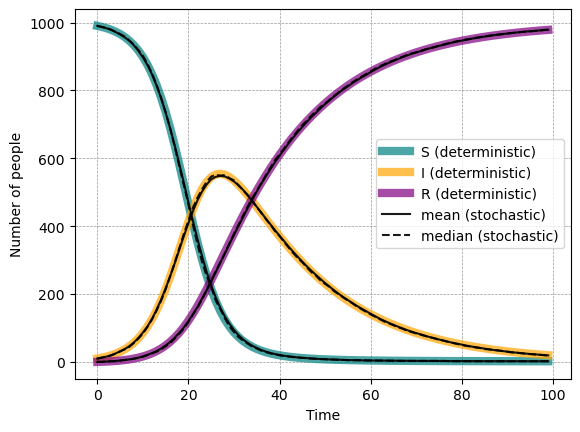

In [79]:
fig, ax = plt.subplots()

ax.plot(S, color='teal', alpha=0.7, label='S (deterministic)', linewidth=6)
ax.plot(I, color='orange', alpha=0.7, label='I (deterministic)', linewidth=6)
ax.plot(R, color='purple', alpha=0.7, label='R (deterministic)', linewidth=6)

ax.plot(quantiles['S']['mean'], 'black', alpha=0.9, label = 'mean (stochastic)')
ax.plot(quantiles['I']['mean'], 'black', alpha=0.9)
ax.plot(quantiles['R']['mean'], 'black', alpha=0.9)

ax.plot(quantiles['S']['50%'], 'black', alpha=0.9, linestyle='--', label = 'median (stochastic)')
ax.plot(quantiles['I']['50%'], 'black', alpha=0.9, linestyle='--')
ax.plot(quantiles['R']['50%'], 'black', alpha=0.9, linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

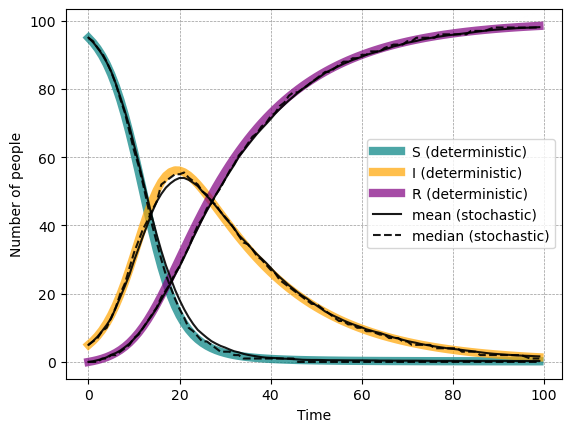

In [83]:
S, I, R = det_sir(S0=95, I0=5, R0=0, beta=0.3, gamma=0.05, n_days=100)
sir_sto = pd.DataFrame(columns=['t', 'S', 'I', 'R'])

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=95, I0=5, R0=0, beta=0.3, gamma=0.05, n_days=100)
    df = pd.DataFrame({'t': range(0,100),
                       'S': S_sto, 
                       'I': I_sto, 
                       'R': R_sto})
    sir_sto = pd.concat([sir_sto, df], ignore_index=True)

sir_sto[['S', 'I', 'R']] = sir_sto[['S', 'I', 'R']].apply(pd.to_numeric)
quantiles = sir_sto.groupby('t').describe(percentiles=[.05, .5, .95])

fig, ax = plt.subplots()

ax.plot(S, color='teal', alpha=0.7, label='S (deterministic)', linewidth=6)
ax.plot(I, color='orange', alpha=0.7, label='I (deterministic)', linewidth=6)
ax.plot(R, color='purple', alpha=0.7, label='R (deterministic)', linewidth=6)

ax.plot(quantiles['S']['mean'], 'black', alpha=0.9, label = 'mean (stochastic)')
ax.plot(quantiles['I']['mean'], 'black', alpha=0.9)
ax.plot(quantiles['R']['mean'], 'black', alpha=0.9)

ax.plot(quantiles['S']['50%'], 'black', alpha=0.9, linestyle='--', label = 'median (stochastic)')
ax.plot(quantiles['I']['50%'], 'black', alpha=0.9, linestyle='--')
ax.plot(quantiles['R']['50%'], 'black', alpha=0.9, linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()